<a href="https://colab.research.google.com/github/smkmohsin/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction_Sheikh_Mohsin_Kader_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

#<b> Importing the libraries


In [588]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [589]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [590]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Almabetter/Module 4/Capstone Project/data_YesBank_StockPrices.csv')

# <b> Data Inspection

In [591]:
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [592]:
dataset.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [593]:
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [594]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [595]:
dataset.shape

(185, 5)

# <b>DataSet Information:</b>

**Date:** It contains month & year from July 2005 - November 2020.

**Open:** The open is the starting day of month of trading on a securities exchange or organized over-the-counter market. 

**High:** The high is the highest price at which a stock traded during a month.

**Low:** The low is the lowest price of the month.

**Close:** The close is a reference to the end of a trading session in the financial markets when the markets close for the day(Here it is for the month).


# <b> Exploratory Data Analysis

In [596]:
# Check null data
dataset.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [597]:
date_ = dataset['Date']

In [598]:
dataset = dataset.set_index('Date')

In [599]:
dataset.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

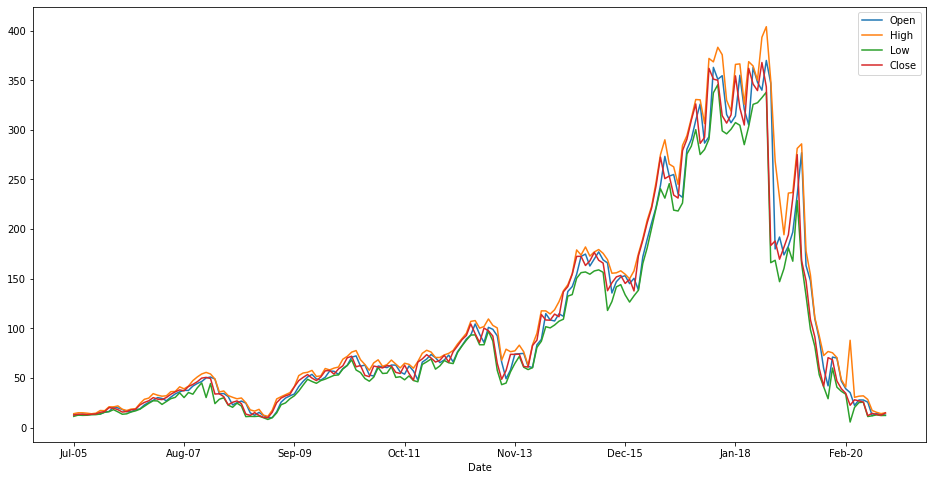

In [600]:
for col in dataset.columns[0:]:
    feature = dataset[col]
    feature.plot(figsize=(16, 8))
    plt.legend(dataset.columns)
plt.show()

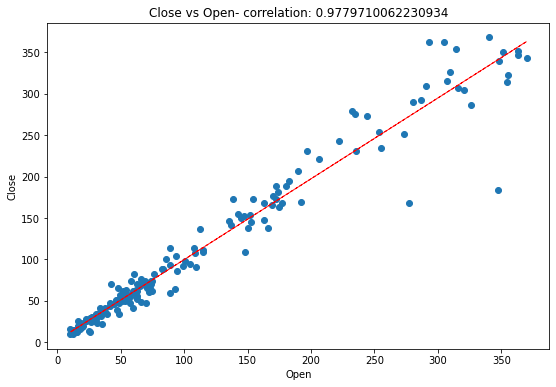

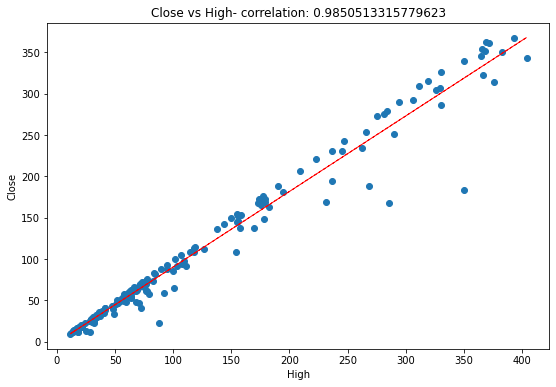

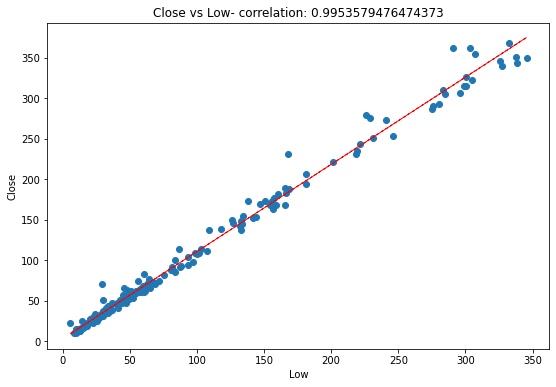

In [601]:
for col in dataset.columns[:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Close'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

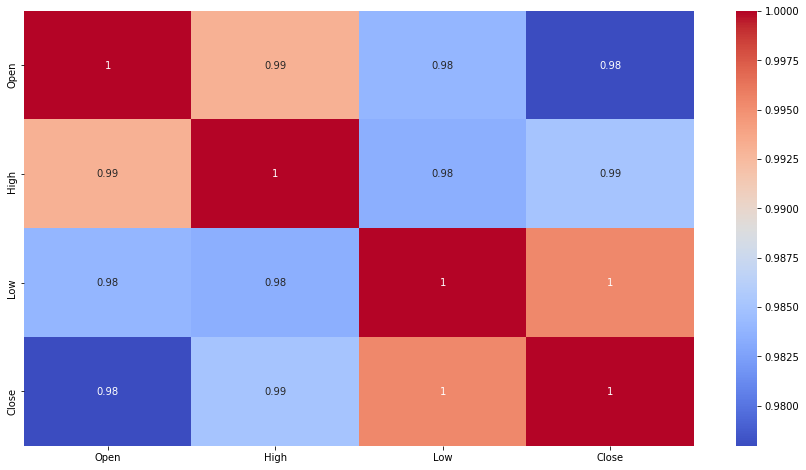

In [602]:
# Check Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

###<b>VIF Analysis

In [603]:
# Check Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Function for returning a Dataset after checking VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [604]:
calc_vif(dataset[[i for i in dataset.columns if i not in ['Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [605]:
calc_vif(dataset[[i for i in dataset.columns if i not in ['Close','Open']]])

,variables,VIF
0,High,62.598129
1,Low,62.598129


In [606]:
# Take 'Low' as feature variable
X = dataset[['Low']].values

In [607]:
#create 'Close' column as target variable (Dependent Variable)
y = dataset[['Close']].values

## <b>Splitting the dataset into the Training set and Test set

In [608]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(148, 1)
(37, 1)


## <b>Training the Linear Regression model on the Training set

In [609]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

In [610]:
lr.coef_

array([[1.07386552]])

In [611]:
lr.intercept_

array([3.12605855])

In [612]:
lr_pred = lr.predict(X_test)

# <b> Visualization 

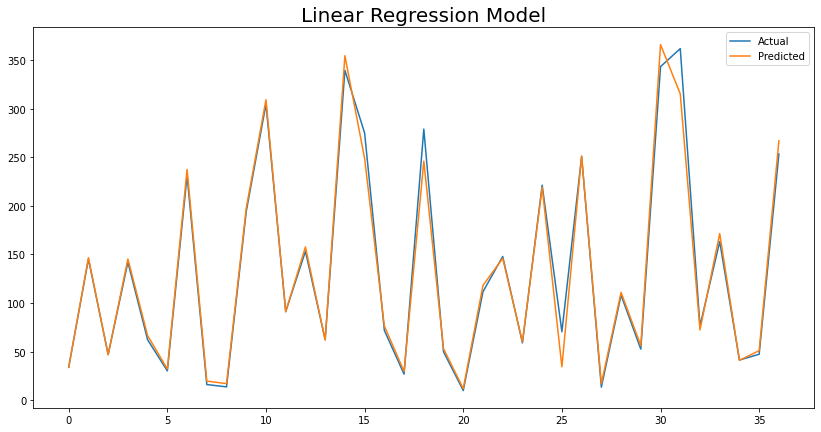

In [613]:
plt.figure(figsize=(14,7))
plt.plot(np.array((y_test)))
plt.plot((lr_pred))

plt.title('Linear Regression Model', fontsize= 20)
plt.legend(["Actual","Predicted"])
plt.show()

## <b>Evaluating the Model Performance

In [614]:
MSE  = mean_squared_error(y_test, lr_pred)
print("MSE :" , round(MSE,4))
RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,4))

r2 = r2_score((y_test), (lr_pred))
print("R2 :" ,round(r2,4))
print("Adjusted R2 : ",round(1-(1-r2_score(y_test, lr_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MSE : 176.9637
RMSE : 13.3028
R2 : 0.9843
Adjusted R2 :  0.9838


# <b> Implementing Lasso Regression

In [615]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [616]:
lasso.score(X_train, y_train)

0.9925043764866349

In [617]:
lasso.coef_

array([1.07386551])

# <b> Grid Search Cross Validation for Lasso Regression </b>

In [618]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [619]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -72.05020915009386


In [620]:
y_pred_lasso = lasso_regressor.predict(X_test)

# <b> Visualization 

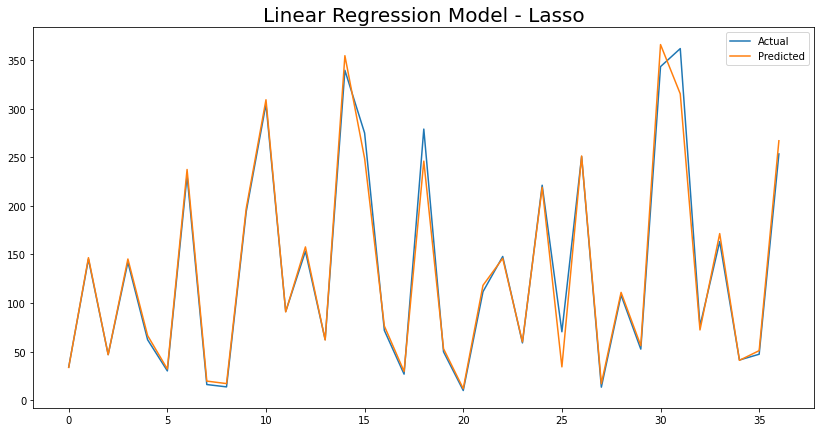

In [621]:
plt.figure(figsize=(14,7))
plt.plot((np.array(y_test)))
plt.plot((y_pred_lasso))

plt.title('Linear Regression Model - Lasso', fontsize= 20)
plt.legend(["Actual","Predicted"])
plt.show()

## <b>Evaluating the Model Performance

In [622]:
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("MSE :" , round(MSE,4))
RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,4))

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,round(r2,4))
print("Adjusted R2 : ",round(1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MSE : 176.9637
RMSE : 13.3028
R2 : 0.9843
Adjusted R2 :  0.9838


# <b> Implementing Ridge Regression

In [623]:
from sklearn.linear_model import Ridge
ridge  = Ridge(alpha=0.1)

In [624]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [625]:
ridge.score(X_train, y_train)

0.9925043764866276

In [626]:
y_pred_r = ridge.predict(X_test)

## <b>Evaluating the Model Performance

In [627]:
MSE  = mean_squared_error(y_test, y_pred_r)
print("MSE :" , round(MSE,4))
RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,4))

r2 = r2_score((y_test), (y_pred_r))
print("R2 :" ,round(r2,4))
print("Adjusted R2 : ",round(1-(1-r2_score(y_test, y_pred_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MSE : 176.9637
RMSE : 13.3028
R2 : 0.9843
Adjusted R2 :  0.9838


# <b> Grid Search Cross Validation for Ridge Regression </b>

In [628]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [629]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -73.08623645677095


In [630]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

## <b>Evaluating the Model Performance

In [631]:
MSE  = mean_squared_error(y_test, y_pred_ridge)
print("MSE :" , round(MSE,4))
RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,4))

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,round(r2,4))
print("Adjusted R2 : ",round(1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MSE : 176.9637
RMSE : 13.3028
R2 : 0.9843
Adjusted R2 :  0.9838


# <b> Visualization 

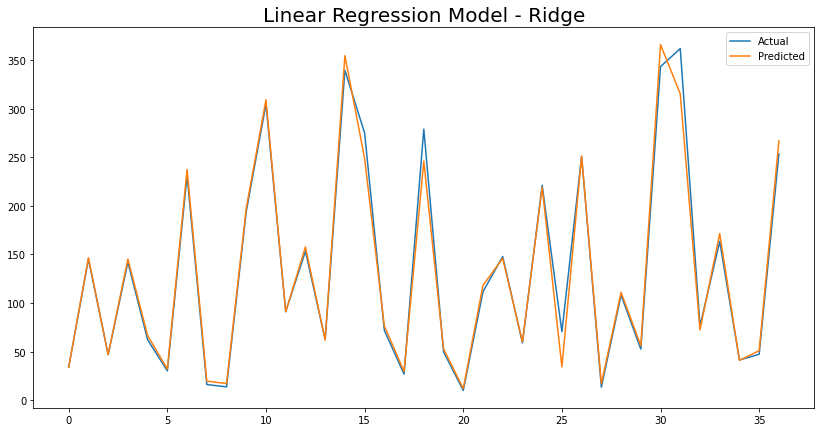

In [632]:
plt.figure(figsize=(14,7))
plt.plot((np.array(y_test)))
plt.plot((y_pred_ridge))

plt.title('Linear Regression Model - Ridge', fontsize= 20)
plt.legend(["Actual","Predicted"])
plt.show()

# <b> Implementing Elastic Net Regression

In [633]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [634]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [635]:
elasticnet.score(X_train, y_train)

0.9925043763336149

In [636]:
y_pred_en = elasticnet.predict(X_test)

## <b>Evaluating the Model Performance

In [637]:
MSE  = mean_squared_error(y_test, y_pred_en)
print("MSE :" , round(MSE,4))

RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,4))

r2 = r2_score((y_test), (y_pred_en))
print("R2 :" ,round(r2,4))
print("Adjusted R2 : ",round(1-(1-r2_score(y_test, y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MSE : 176.9658
RMSE : 13.3029
R2 : 0.9843
Adjusted R2 :  0.9838


In [638]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [639]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15, 'l1_ratio': 0.3}

Using  {'alpha': 1e-15, 'l1_ratio': 0.3}  the negative mean squared error is:  -72.05020915009386


In [640]:
y_pred_en = elastic_regressor.predict(X_test)

## <b>Evaluating the Model Performance

In [641]:
MSE  = mean_squared_error(y_test, y_pred_en)
print("MSE :" , round(MSE,4))

RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,4))

r2 = r2_score((y_test), (y_pred_en))
print("R2 :" ,round(r2,4))
print("Adjusted R2 : ",round(1-(1-r2_score(y_test, y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MSE : 176.9637
RMSE : 13.3028
R2 : 0.9843
Adjusted R2 :  0.9838


# <b> Visualization 

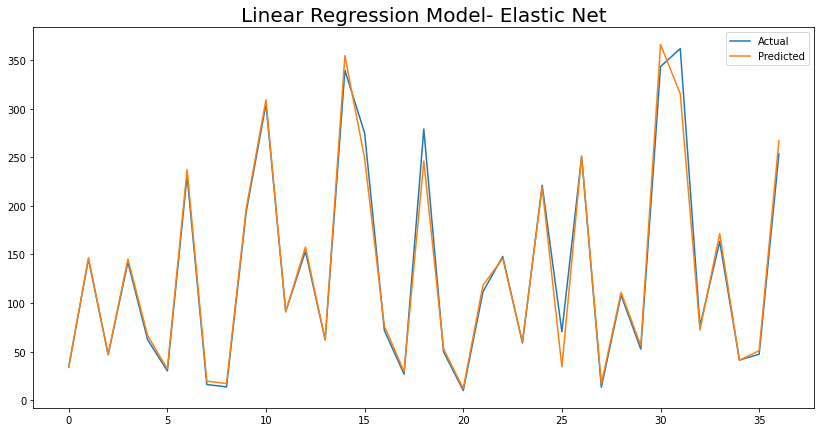

In [642]:
plt.figure(figsize=(14,7))
plt.plot((np.array(y_test)))
plt.plot((y_pred_en))

plt.title('Linear Regression Model- Elastic Net', fontsize= 20)
plt.legend(["Actual","Predicted"])
plt.show()

## <b>Training the Polynomial Regression model on the Training set

In [643]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 6)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [644]:
poly_pred = regressor.predict(poly_reg.transform(X_test))

# <b> Visualization 

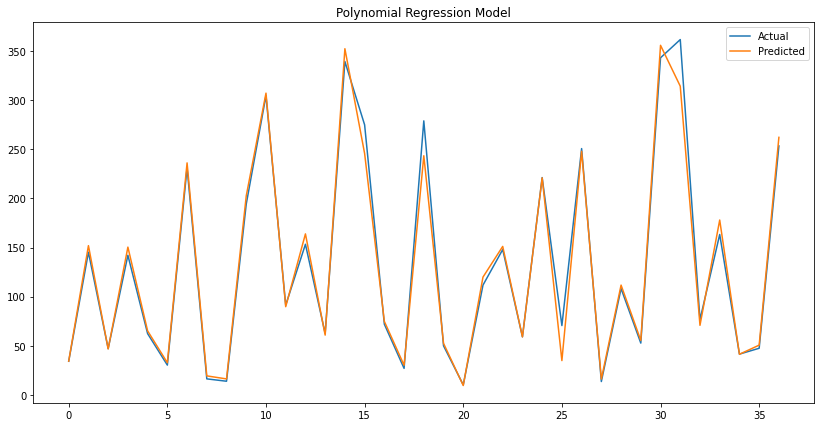

In [645]:
plt.figure(figsize=(14,7))
plt.plot(y_test)
plt.plot(poly_pred)

plt.title('Polynomial Regression Model')
plt.legend(["Actual","Predicted"])
plt.show()

## <b>Evaluating the Model Performance

In [646]:
MSE  = mean_squared_error(y_test, poly_pred)
print("MSE :" , round(MSE,4))

RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,4))

r2 = r2_score((y_test), (poly_pred))
print("R2 :" ,round(r2,4))
print("Adjusted R2 : ",round(1-(1-r2_score(y_test, poly_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MSE : 184.0824
RMSE : 13.5677
R2 : 0.9836
Adjusted R2 :  0.9832


## <b>Training the Decision Tree Regression model on the Training set

In [647]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

##<b> Predicting the Test set results

In [648]:
Dtree_pred = regressor.predict(X_test)

# <b> Visualization 

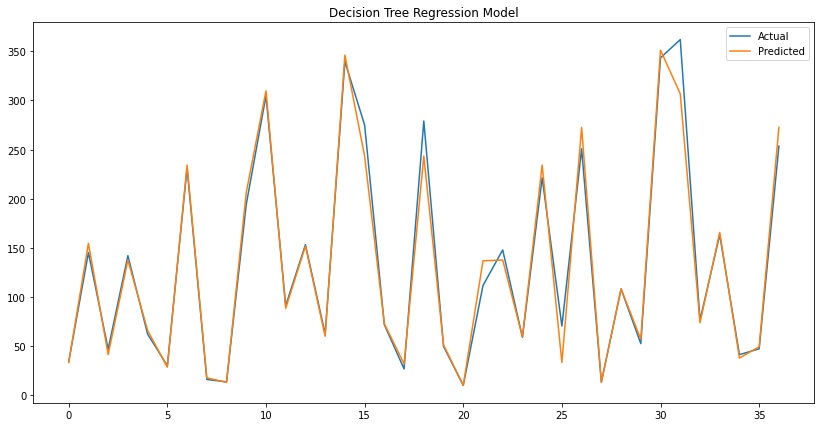

In [649]:
plt.figure(figsize=(14,7))
plt.plot(y_test)
plt.plot(Dtree_pred)

plt.title('Decision Tree Regression Model')
plt.legend(["Actual","Predicted"])
plt.show()

## <b>Evaluating the Model Performance

In [650]:
MSE  = mean_squared_error(y_test, Dtree_pred)
print("MSE :" , round(MSE,4))

RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,4))

r2 = r2_score((y_test), (Dtree_pred))
print("R2 :" ,round(r2,4))
print("Adjusted R2 : ",round(1-(1-r2_score(y_test, Dtree_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MSE : 242.0856
RMSE : 15.5591
R2 : 0.9785
Adjusted R2 :  0.9779


## <b>Training the Random Forest Regression model on the whole dataset

In [651]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [652]:
ran_forest_pred = regressor.predict(X_test)

# <b> Visualization 

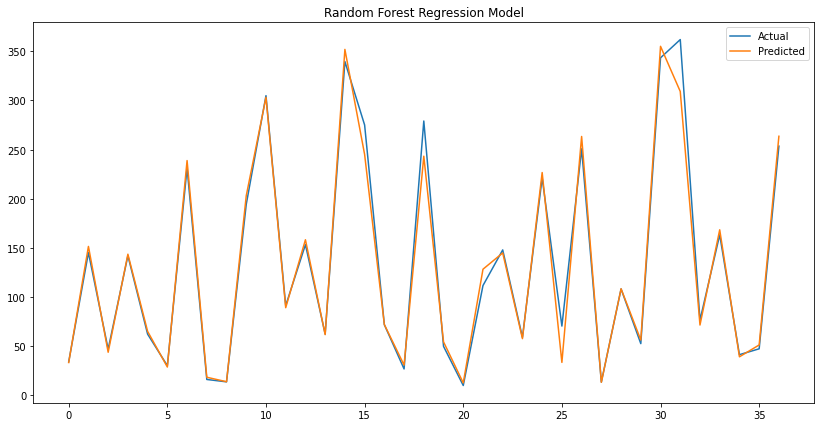

In [653]:
plt.figure(figsize=(14,7))
plt.plot(y_test)
plt.plot(ran_forest_pred)

plt.title('Random Forest Regression Model')
plt.legend(["Actual","Predicted"])
plt.show()

## <b>Evaluating the Model Performance

In [654]:
MSE  = mean_squared_error(y_test, ran_forest_pred)
print("MSE :" , round(MSE,4))

RMSE = np.sqrt(MSE)
print("RMSE :" ,round(RMSE,4))

r2 = r2_score((y_test), (ran_forest_pred))
print("R2 :" ,round(r2,4))
print("Adjusted R2 : ",round(1-(1-r2_score(y_test, ran_forest_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MSE : 204.2755
RMSE : 14.2925
R2 : 0.9819
Adjusted R2 :  0.9813


# <b>Future Prediction

In [655]:
# Create a variable to predict 'x' Months out into future
future_months = 24

In [656]:
#@title This column will be the Target variable(Dependent variable) for predicting future close price. We are going to predict future close price of 24 months.

# Create a column 'Prediction' and shift 'x' Months for future prediction
dataset['Prediction'] = dataset[['Close']].shift(-future_months)

In [657]:
dataset

,Open,High,Low,Close,Prediction
Date,,,,,
Jul-05,13.00,14.00,11.25,12.46,37.93
Aug-05,12.58,14.88,12.55,13.42,36.99
Sep-05,13.48,14.87,12.27,13.30,41.36
Oct-05,13.20,14.47,12.40,12.99,43.48
Nov-05,13.35,13.88,12.88,13.41,46.18
...,...,...,...,...,...
Jul-20,25.60,28.30,11.10,11.95,NaN
Aug-20,12.00,17.16,11.85,14.37,NaN
Sep-20,14.30,15.34,12.75,13.15,NaN


In [658]:
# Create Independent variable for train test split
X = dataset.iloc[:-future_months]['Close'].values

In [659]:
len(X)

161

In [660]:
# Reshape
X = X.reshape(X.shape[0],1)

In [661]:
# Create dependent variable
y = dataset['Prediction'][:-future_months].values

In [662]:
y

array([ 37.93,  36.99,  41.36,  43.48,  46.18,  49.81,  50.54,  49.42,
        33.75,  34.06,  31.13,  22.85,  25.45,  26.83,  24.13,  13.58,
        12.26,  15.03,  12.24,  10.26,   9.98,  15.45,  25.12,  29.68,
        31.93,  33.45,  40.99,  47.31,  50.57,  53.41,  49.84,  47.32,
        50.97,  57.1 ,  57.57,  53.83,  58.99,  62.22,  70.3 ,  71.86,
        61.21,  62.54,  52.59,  51.29,  61.98,  61.02,  60.07,  62.38,
        62.13,  55.61,  54.5 ,  62.9 ,  54.49,  47.72,  65.99,  69.14,
        73.46,  70.07,  66.02,  67.83,  72.85,  65.97,  76.44,  82.29,
        88.48,  92.84, 104.41,  94.5 ,  85.71, 100.28,  97.49,  92.2 ,
        64.76,  48.65,  57.5 ,  73.76,  73.74,  74.02,  61.59,  60.95,
        82.7 ,  88.14, 113.89, 108.38, 108.21, 114.33, 111.7 , 136.83,
       142.08, 154.57, 172.5 , 172.55, 163.31, 167.96, 176.52, 168.6 ,
       165.74, 137.9 , 145.92, 151.82, 153.3 , 145.23, 149.38, 137.67,
       172.91, 188.73, 206.39, 221.3 , 243.44, 272.56, 250.85, 253.52,
      

In [663]:
len(y)

161

## <b>Splitting the dataset into the Training set and Test set

In [664]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(128, 1)
(33, 1)


##<b> Training the Multiple Linear Regression model on the Training set

In [665]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [666]:
# Create test set for future prediction
X_future = dataset.iloc[:-future_months]['Close']  # eliminate last 'x' months from dataset
X_future = X_future.tail(future_months).values     # take last 'x' months from X_future for future prediction
X_future = X_future.reshape(X_future.shape[0],1)
X_future

array([[231.26],
       [279.1 ],
       [290.56],
       [309.82],
       [326.14],
       [286.38],
       [292.37],
       [361.96],
       [351.15],
       [350.  ],
       [314.35],
       [306.8 ],
       [315.05],
       [354.45],
       [322.25],
       [304.9 ],
       [362.05],
       [346.2 ],
       [339.6 ],
       [367.9 ],
       [343.4 ],
       [183.45],
       [188.05],
       [169.65]])

In [667]:
lr_prediction = lr.predict(X_future)
print(lr_prediction)

[155.07226052 170.23837595 173.87139607 179.97715241 185.15087741
 172.54626308 174.44519768 196.50644293 193.07948415 192.71491407
 181.41324152 179.01975967 181.63515374 194.12564178 183.91767947
 178.41742649 196.5349745  191.51024771 189.41793246 198.38952666
 190.62259882 139.91565562 141.37393595 135.54081463]


# <b> Visualization 

<function matplotlib.pyplot.show>

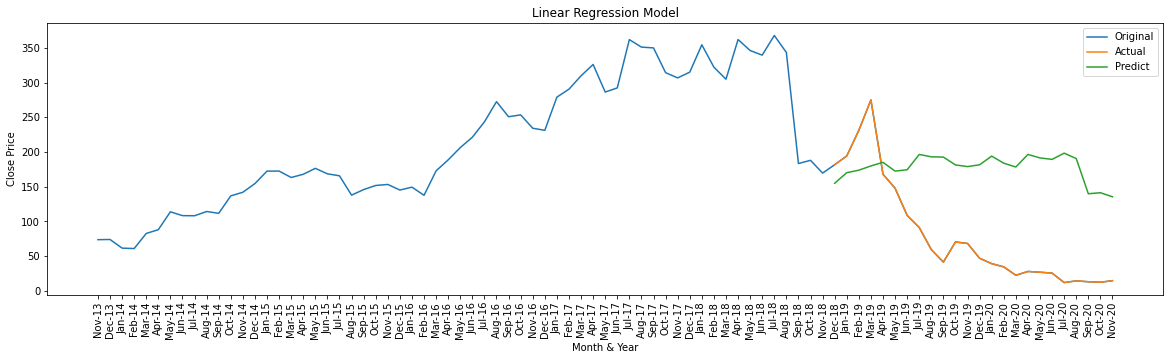

In [668]:
predictions = lr_prediction

valid = dataset[X.shape[0]:]                    # create dataset which contains tha actual value of stock
valid['Prediction'] = predictions               # add the predicted values in the dataset

plt.figure(figsize=(20,5))
plt.title('Linear Regression Model')
plt.xlabel('Month & Year')
plt.ylabel('Close Price')

df = dataset[100:]
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Original','Actual', 'Predict'])
plt.xticks(rotation=90)

plt.show

## <b>Evaluating the Model Performance

In [669]:
r2 = r2_score(valid[['Close']].values, valid[['Prediction']].values)
print("R2 :" ,round(r2,4))

R2 : -1.7372


## <b>Training the Polynomial Regression model on the Training set

In [673]:
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [674]:
Poly_prediction = regressor.predict(poly_reg.transform(X_future))

# <b> Visualization 

<function matplotlib.pyplot.show>

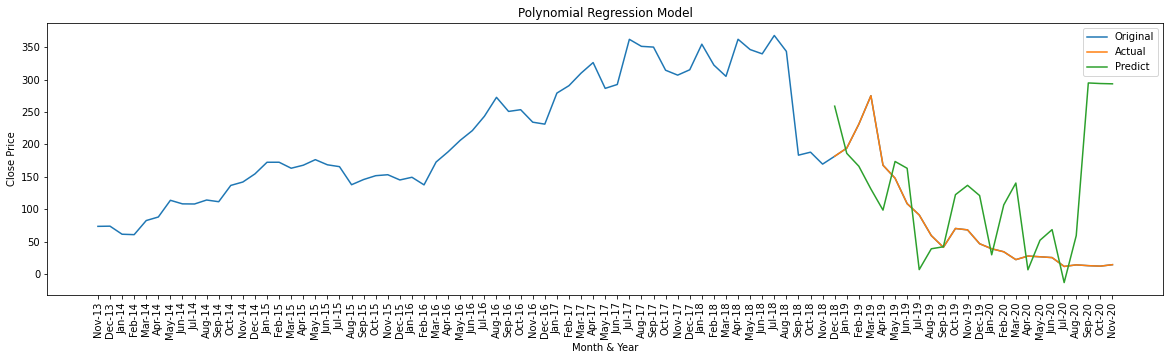

In [675]:
predictions = Poly_prediction

valid = dataset[X.shape[0]:]                    # create dataset which contains tha actual value of stock
valid['Prediction'] = predictions               # add the predicted values in the dataset

plt.figure(figsize=(20,5))
plt.title('Polynomial Regression Model')
plt.xlabel('Month & Year')
plt.ylabel('Close Price')

df = dataset[100:]
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Original','Actual', 'Predict'])
plt.xticks(rotation=90)

plt.show

## <b>Evaluating the Model Performance

In [676]:
r2 = r2_score(valid[['Close']].values, valid[['Prediction']].values)
print("R2 :" ,round(r2,4))

R2 : -1.3139


## <b>Training the Decision Tree Regression model on the Training set

In [680]:
tree_pred = DecisionTreeRegressor().fit(X_train, y_train)

In [681]:
tree_prediction = tree_pred.predict(X_future)
print(tree_prediction)

[181.75 194.3  231.2  275.05 168.   147.95 108.7   27.95  59.5   41.45
  46.95  22.45  46.95  39.2   34.55  22.45  27.95  26.85  25.6   11.95
  14.37  13.15  13.15  14.67]


# <b> Visualization 

<function matplotlib.pyplot.show>

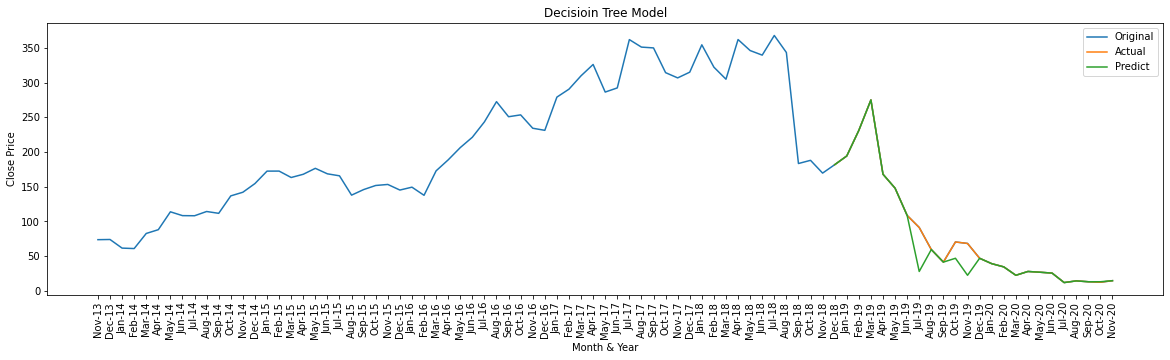

In [682]:
predictions = tree_prediction

valid = dataset[X.shape[0]:]                    # create dataset which contains tha actual value of stock
valid['Prediction'] = predictions               # add the predicted values in the dataset

plt.figure(figsize=(20,5))
plt.title('Decisioin Tree Model')
plt.xlabel('Month & Year')
plt.ylabel('Close Price')

df = dataset[100:]
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Original','Actual', 'Predict'])
plt.xticks(rotation=90)

plt.show

## <b>Evaluating the Model Performance

In [683]:
r2 = r2_score(valid[['Close']].values, valid[['Prediction']].values)
print("R2 :" ,round(r2,4))

R2 : 0.9519


## <b>Training the Random Forest Regression model on the whole dataset

In [694]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [695]:
Random_forest_prediction = regressor.predict(X_future)

# <b> Visualization 

<function matplotlib.pyplot.show>

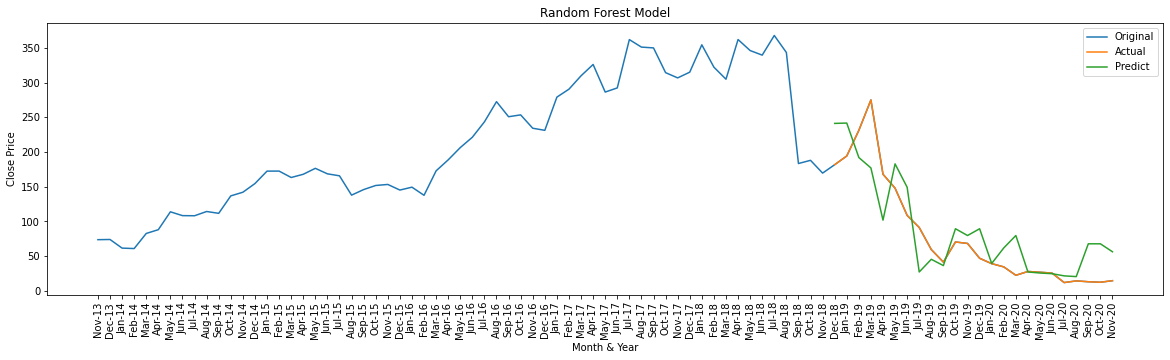

In [696]:
predictions = Random_forest_prediction

valid = dataset[X.shape[0]:]                    # create dataset which contains tha actual value of stock
valid['Prediction'] = predictions               # add the predicted values in the dataset

plt.figure(figsize=(20,5))
plt.title('Random Forest Model')
plt.xlabel('Month & Year')
plt.ylabel('Close Price')

df = dataset[100:]
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Original','Actual', 'Predict'])
plt.xticks(rotation=90)

plt.show

## <b>Evaluating the Model Performance

In [697]:
r2 = r2_score(valid[['Close']].values, valid[['Prediction']].values)
print("R2 :" ,round(r2,4))

R2 : 0.6917
